In [84]:
from sklearn import metrics
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
#import scikitplot as skplt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [85]:
# Reading the Dataset
df_train=pd.read_csv("Hotel-A-train.csv")
df_test=pd.read_csv("Hotel-A-test.csv")
df_validate=pd.read_csv("Hotel-A-Validation.csv")

In [86]:
# Check null values
df_train.isnull().values.any()
df_test.isnull().values.any()

False

In [87]:
df_train.describe()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,43.977454,2.333576,1.743882,0.351540,12.495182,175.136478
std,2.886911e+07,15.303148,1.176526,0.721972,0.573326,11.206036,43.877087
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,2.523943e+07,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,5.014996e+07,44.000000,2.000000,2.000000,0.000000,10.000000,175.000000
75%,7.518288e+07,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


In [88]:
# Subject col not usefull hence dropped
if('Reservation-id' in df_train.columns):
    df_train.drop('Reservation-id', axis =1, inplace=True)
if('Reservation-id' in df_validate.columns):
    df_validate.drop('Reservation-id', axis =1, inplace=True)  

In [89]:
if('Reservation-id' in df_train.columns):
    df_train.drop('Reservation-id', axis =1, inplace=True)
if('Reservation-id' in df_validate.columns):
    df_validate.drop('Reservation-id', axis =1, inplace=True)
    
if('Country_region' in df_train.columns):
    df_train.drop('Country_region', axis =1, inplace=True)
if('Country_region' in df_validate.columns):
    df_validate.drop('Country_region', axis =1, inplace=True)

if('Booking_channel' in df_train.columns):
    df_train.drop('Booking_channel', axis =1, inplace=True)
if('Booking_channel' in df_validate.columns):
    df_validate.drop('Booking_channel', axis =1, inplace=True)

if('Use_Promotion' in df_train.columns):
    df_train.drop('Use_Promotion', axis =1, inplace=True)
if('Use_Promotion' in df_validate.columns):
    df_validate.drop('Use_Promotion', axis =1, inplace=True)

if('Visted_Previously' in df_train.columns):
    df_train.drop('Visted_Previously', axis =1, inplace=True)
if('Visted_Previously' in df_validate.columns):
    df_validate.drop('Visted_Previously', axis =1, inplace=True)
    
if('Required_Car_Parking' in df_train.columns):
    df_train.drop('Required_Car_Parking', axis =1, inplace=True)
if('Required_Car_Parking' in df_validate.columns):
    df_validate.drop('Required_Car_Parking', axis =1, inplace=True)
    
if('Educational_Level' in df_train.columns):
    df_train.drop('Educational_Level', axis =1, inplace=True)
if('Educational_Level' in df_validate.columns):
    df_validate.drop('Educational_Level', axis =1, inplace=True)  

if('Booking_date' in df_train.columns):
    df_train.drop('Booking_date', axis =1, inplace=True)
if('Booking_date' in df_validate.columns):
    df_validate.drop('Booking_date', axis =1, inplace=True)    

if('Gender' in df_train.columns):
    df_train.drop('Gender', axis =1, inplace=True)
if('Gender' in df_validate.columns):
    df_validate.drop('Gender', axis =1, inplace=True)  
    

if('Previous_Cancellations' in df_train.columns):
    df_train.drop('Previous_Cancellations', axis =1, inplace=True)
if('Previous_Cancellations' in df_validate.columns):
    df_validate.drop('Previous_Cancellations', axis =1, inplace=True)  
    
if('Children' in df_train.columns):
    df_train.drop('Children', axis =1, inplace=True)
if('Children' in df_validate.columns):
    df_validate.drop('Children', axis =1, inplace=True)  

if('Age' in df_train.columns):
    df_train.drop('Age', axis =1, inplace=True)
if('Age' in df_validate.columns):
    df_validate.drop('Age', axis =1, inplace=True)  
    
if('Income' in df_train.columns):
    df_train.drop('Income', axis =1, inplace=True)
if('Income' in df_validate.columns):
    df_validate.drop('Income', axis =1, inplace=True)
    
    
if('Room_Rate' in df_train.columns):
    df_train.drop('Room_Rate', axis =1, inplace=True)
if('Room_Rate' in df_validate.columns):
    df_validate.drop('Room_Rate', axis =1, inplace=True)  
    
if('Discount_Rate' in df_train.columns):
    df_train.drop('Discount_Rate', axis =1, inplace=True)
if('Discount_Rate' in df_validate.columns):
    df_validate.drop('Discount_Rate', axis =1, inplace=True)  
    


In [90]:
df_train

,Ethnicity,Hotel_Type,Expected_checkin,Expected_checkout,Adults,Babies,Meal_Type,Deposit_type,Reservation_Status
0,Latino,City Hotel,7/1/2015,7/2/2015,2,0,BB,No Deposit,Check-In
1,Latino,City Hotel,7/1/2015,7/2/2015,3,0,BB,Refundable,Check-In
2,caucasian,City Hotel,7/2/2015,7/6/2015,3,0,BB,No Deposit,Check-In
3,African American,Airport Hotels,7/2/2015,7/3/2015,4,0,BB,Refundable,Check-In
4,Latino,Resort,7/3/2015,7/4/2015,1,0,BB,No Deposit,Check-In
...,...,...,...,...,...,...,...,...,...
27494,African American,City Hotel,8/31/2016,9/1/2016,1,1,HB,No Deposit,Check-In
27495,Asian American,Airport Hotels,8/31/2016,9/1/2016,2,0,BB,Refundable,No-Show
27496,Latino,Airport Hotels,9/1/2016,9/2/2016,2,1,HB,No Deposit,Check-In
27497,African American,Airport Hotels,8/31/2016,9/1/2016,3,0,FB,No Deposit,Canceled


In [96]:
# Encoding target - converting non-num to num variable
le = preprocessing.LabelEncoder()
for x in [df_train, df_validate]:
    x['Ethnicity'] = le.fit_transform(x.Ethnicity)
    x['Hotel_Type'] = le.fit_transform(x.Hotel_Type)
    x['Meal_Type'] = le.fit_transform(x.Meal_Type)
    x['Deposit_type'] = le.fit_transform(x.Deposit_type)
    x['Reservation_Status'] = le.fit_transform(x.Reservation_Status)
    x['Expected_checkin'] = pd.to_datetime(x['Expected_checkin']).apply(lambda y: y.toordinal())
    x['Expected_checkout'] = pd.to_datetime(x['Expected_checkout']).apply(lambda y: y.toordinal())
   

In [97]:
# Split into features and class
df_traindata, df_trainlabel = df_train.loc[:, df_train.columns != 'Reservation_Status'], df_train.iloc[:,df_train.columns == 'Reservation_Status']
df_validatedata, df_validatelabel = df_validate.iloc[:, df_validate.columns != 'Reservation_Status'], df_validate.iloc[:,df_train.columns == 'Reservation_Status']

In [98]:
df_traindata

,Ethnicity,Hotel_Type,Expected_checkin,Expected_checkout,Adults,Babies,Meal_Type,Deposit_type
0,2,1,719163,719163,2,0,0,0
1,2,1,719163,719163,3,0,0,2
2,3,1,719163,719163,3,0,0,0
3,0,0,719163,719163,4,0,0,2
4,2,2,719163,719163,1,0,0,0
...,...,...,...,...,...,...,...,...
27494,0,1,719163,719163,1,1,2,0
27495,1,0,719163,719163,2,0,0,2
27496,2,0,719163,719163,2,1,2,0
27497,0,0,719163,719163,3,0,1,0


In [99]:
error=[]

for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_traindata,df_trainlabel)
    pred_i=knn.predict(df_validatedata)
    error.append(np.mean(pred_i.reshape(2749,1) != df_validatelabel))

Text(0, 0.5, 'Mean Error')

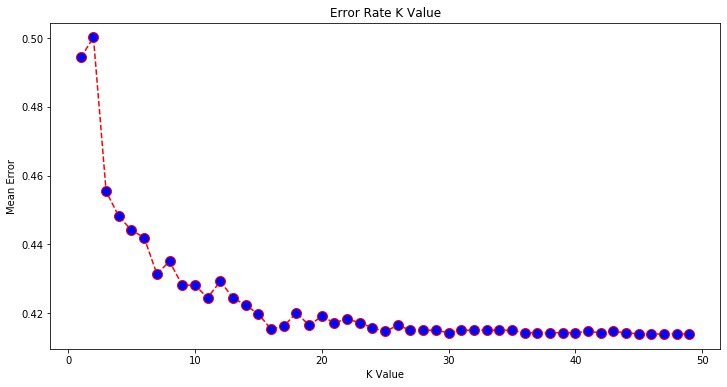

In [100]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [103]:
# Create KNN classifier
knnClassifier = KNeighborsClassifier(n_neighbors = 26, p=3, metric='euclidean' )
# Fit the classifier to the data
knnClassifier.fit(df_traindata,df_trainlabel)
Prediction_y = knnClassifier.predict(df_validatedata)

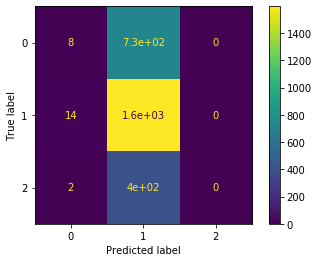

In [104]:
metrics.plot_confusion_matrix(knnClassifier, df_validatedata, df_validatelabel)
plt.show()

In [105]:
print('Accuracy score: {}'.format(accuracy_score(df_validatelabel, Prediction_y)))
print('Precision score: {}'.format(precision_score(df_validatelabel, Prediction_y, average='weighted')))
print('Recall score: {}'.format(recall_score(df_validatelabel, Prediction_y, average='weighted')))
print('F1 score: {}'.format(f1_score(df_validatelabel, Prediction_y, average='weighted')))

Accuracy score: 0.5834849036013096
Precision score: 0.43286933363591773
Recall score: 0.5834849036013096
F1 score: 0.43688353907030464


In [106]:
revid = df_test['Reservation-id']

In [113]:
if('Reservation-id' in df_test.columns):
    df_test.drop('Reservation-id', axis =1, inplace=True)
    
if('Country_region' in df_test.columns):
    df_test.drop('Country_region', axis =1, inplace=True)


if('Booking_channel' in df_test.columns):
    df_test.drop('Booking_channel', axis =1, inplace=True)


if('Use_Promotion' in df_test.columns):
    df_test.drop('Use_Promotion', axis =1, inplace=True)


if('Visted_Previously' in df_test.columns):
    df_test.drop('Visted_Previously', axis =1, inplace=True)

    
if('Required_Car_Parking' in df_test.columns):
    df_test.drop('Required_Car_Parking', axis =1, inplace=True)
    
    
if('Educational_Level' in df_test.columns):
    df_test.drop('Educational_Level', axis =1, inplace=True)


if('Booking_date' in df_test.columns):
    df_test.drop('Booking_date', axis =1, inplace=True)

if('Gender' in df_test.columns):
    df_test.drop('Gender', axis =1, inplace=True)

    

if('Previous_Cancellations' in df_test.columns):
    df_test.drop('Previous_Cancellations', axis =1, inplace=True)

    
if('Children' in df_test.columns):
    df_test.drop('Children', axis =1, inplace=True)


if('Age' in df_test.columns):
    df_test.drop('Age', axis =1, inplace=True)
 
    
if('Income' in df_test.columns):
    df_test.drop('Income', axis =1, inplace=True)

    
if('Room_Rate' in df_test.columns):
    df_test.drop('Room_Rate', axis =1, inplace=True)

if('Discount_Rate' in df_test.columns):
    df_test.drop('Discount_Rate', axis =1, inplace=True)
 
    


In [118]:
le = preprocessing.LabelEncoder()
for x in [df_test]:
    x['Ethnicity'] = le.fit_transform(x.Ethnicity)
    x['Hotel_Type'] = le.fit_transform(x.Hotel_Type)
    x['Meal_Type'] = le.fit_transform(x.Meal_Type)
    x['Deposit_type'] = le.fit_transform(x.Deposit_type)
    x['Expected_checkin'] = pd.to_datetime(x['Expected_checkin']).apply(lambda y: y.toordinal())
    x['Expected_checkout'] = pd.to_datetime(x['Expected_checkout']).apply(lambda y: y.toordinal())
   

In [119]:
out = knnClassifier.predict(df_test)

In [120]:
data = np.array([revid, out])

In [121]:
df = pd.DataFrame(data, ['Reservation-id', 'Reservation_Status'])

In [122]:
output = df.T

In [123]:
output.to_csv('my_submission02.csv', index=False)